# Indices for IPO (TPI) and ENSO(N34) together.

Figure 1. Indices of Pacific SSTA variability for the IPO and ENSO (1880 – 2000 CE, Hadley OI-SST). Shaded bars indicate years when the IPO crosses the phase threshold with red (blue) shading indicating the IPO positive (negative) phase. The thresholds for ENSO positive/negative phases are indicated by the dashed blue and red lines (± 0.5°C).

In [1]:
# #numerical computation
import numpy as np
import pandas as pd
import xarray as xr
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# #plotting
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import cartopy.feature as cf
from matplotlib.gridspec import GridSpec
import matplotlib.pylab as plt
%matplotlib inline 
import proplot as pplt

plt.rcParams.update({'font.sans-serif':'Arial'})


def geo_loc(target,array):
    return array[np.abs(array - target).argmin()]

def standardize(target):
    return ((target - np.mean(target))/np.std(target))

# Load HadOI-SST TPI, N34

In [2]:
# time var:
icam_yrs = np.arange(1880,2000)

# ipo
pth_hadsst = '/network/rit/home/ro553136/orrison/data/reconstructions/sstforc_Had_OI/'
fh_hadipo = xr.open_dataset(pth_hadsst + 'HADSSTOI_ipoinds_1880_2000.nc', decode_times= True)
ipo_index_had = fh_hadipo.tpi_index_11yr

# # load enso
pth_had = '/network/rit/home/ro553136/orrison/data/reconstructions/sstforc_Had_OI/'
fh_ens = xr.open_dataset(pth_had + "HADOISST_ensoinds_1880_2000.nc")
n34ind_had = fh_ens.n34ind_had

#------------------- Capture only the djf season -------------------

n34ind_djf_had = [np.nanmean(n34ind_had[11+i:14+i],axis=0) for i in range(0,1440,12)]
n34ind_djf_had_xr = xr.DataArray(n34ind_djf_had, 
    coords={'time': icam_yrs}, 
    dims=["time"])

In [3]:
# check pos, neg phase years
negenso = []
posenso = []
for i in range(len(n34ind_djf_had_xr)):
    if n34ind_djf_had_xr[i] >= 0.5:
        posenso.append(icam_yrs[i])
    elif n34ind_djf_had_xr[i] <= -0.5:
        negenso.append(icam_yrs[i])

In [4]:
print('Negative ENSO phase years:')
print(np.asarray(negenso))
print('--------------------------------------------------------')
print('Positive ENSO phase years:')
print(np.asarray(posenso))

Negative ENSO phase years:
[1882 1886 1889 1892 1893 1894 1898 1903 1908 1909 1910 1916 1917 1922
 1924 1933 1938 1942 1949 1950 1954 1955 1964 1967 1970 1971 1973 1974
 1975 1983 1984 1985 1988 1995 1998 1999]
--------------------------------------------------------
Positive ENSO phase years:
[1888 1896 1899 1900 1902 1904 1905 1911 1913 1914 1918 1919 1923 1925
 1930 1939 1940 1941 1957 1963 1965 1968 1969 1972 1976 1977 1979 1982
 1986 1987 1991 1994 1997]


In [5]:
halfsig = np.std(ipo_index_had) / 2
topthresh = np.mean(ipo_index_had) + halfsig
botthresh = np.mean(ipo_index_had) - halfsig

# check pos, neg phase years
negipo = []
posipo = []
for i in range(len(ipo_index_had)):
    if ipo_index_had[i] >= topthresh:
        posipo.append(ipo_index_had.time[i])
    elif ipo_index_had[i] <= botthresh:
        negipo.append(ipo_index_had.time[i])

In [6]:
print('Negative IPO phase years:')
print(xr.concat(negipo, dim='time').data)
print('--------------------------------------------------------')
print('Positive IPO phase years:')
print(xr.concat(posipo, dim='time').data)

Negative IPO phase years:
[1882 1888 1889 1890 1891 1892 1893 1894 1895 1912 1913 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976]
--------------------------------------------------------
Positive IPO phase years:
[1898 1899 1900 1901 1902 1903 1904 1905 1907 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999]


# plotting

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Arial
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Arial
findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans' not found because none of the following families were found: Arial


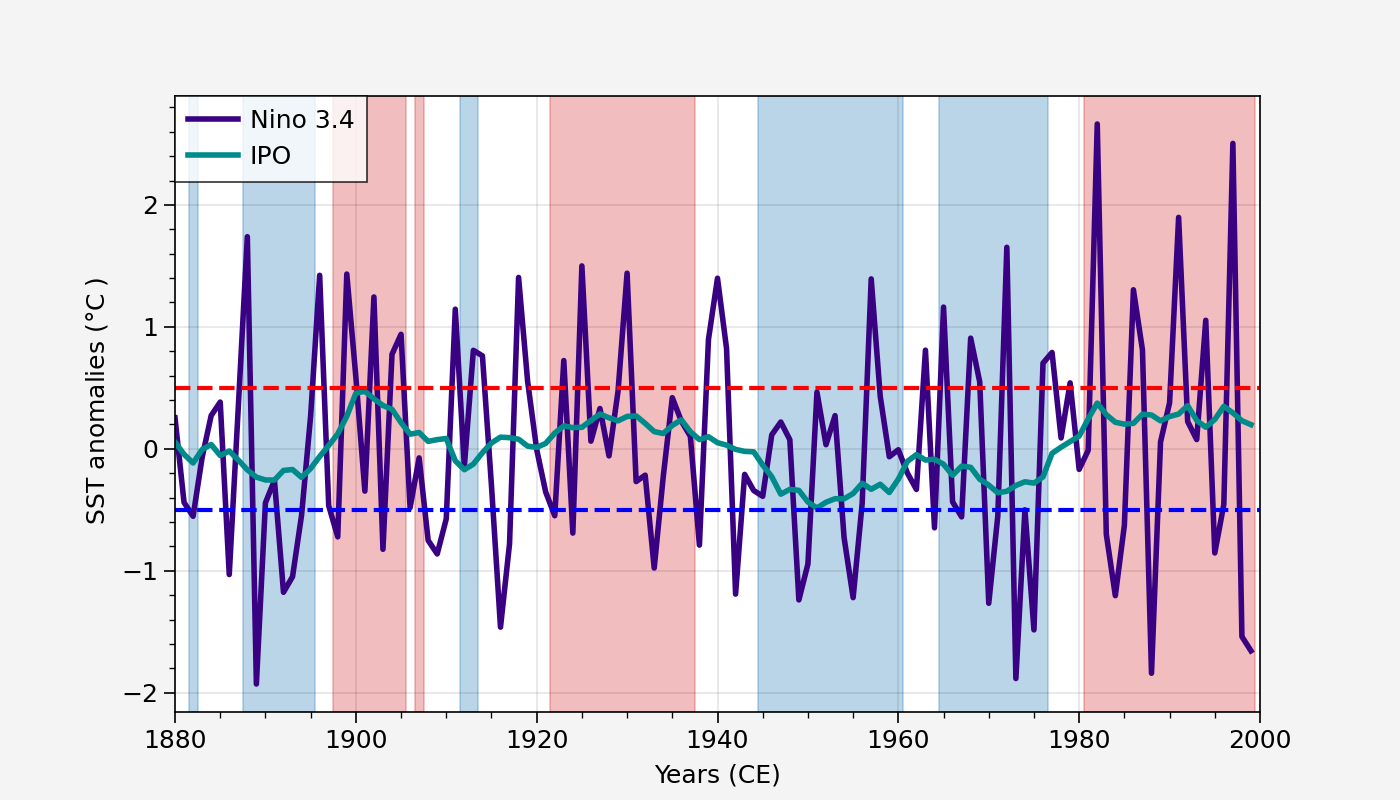

In [7]:
# Plotting

fig,ax=plt.subplots(figsize=(7,4))
# tpi = ax.plot(icam_yrs,ipo_index_had_11yr, label = 'TPI; 11 yr')  
n34 = ax.plot(icam_yrs,n34ind_djf_had_xr,  color='indigo', lw = 2, label = 'Nino 3.4')
tpi = ax.plot(icam_yrs,ipo_index_had, color='darkcyan', lw = 2, label = 'IPO')  
leg = ax.legend(loc='upper left')
ax.set_ylabel(r' SST anomalies ($\degree C\;$)')
ax.set_xlabel('Years (CE)')

# Pos IPO phases
plt.axvspan(1897.5, 1905.5, alpha=0.3, color='#D62728')  
plt.axvspan(1906.5, 1907.5, alpha=0.3, color='#D62728')
plt.axvspan(1921.5, 1937.5, alpha=0.3, color='#D62728')
plt.axvspan(1980.5, 1999.5, alpha=0.3, color='#D62728')

# Neg IPO phases
plt.axvspan(1881.5, 1882.5, alpha=0.3, color='#1F77B4')
plt.axvspan(1887.5, 1895.5, alpha=0.3, color='#1F77B4')
plt.axvspan(1911.5, 1913.5, alpha=0.3, color='#1F77B4')
plt.axvspan(1944.5, 1960.5, alpha=0.3, color='#1F77B4')
plt.axvspan(1964.5, 1976.5, alpha=0.3, color='#1F77B4')

# ENSO threshold
# posy=(np.mean(n34ind_djf_had_xr) + 0.5)
# negy=(np.mean(n34ind_djf_had_xr) - 0.5)
# posy_ts=np.ones(len(icam_yrs))* 0.5
# negy_ts=np.ones(len(icam_yrs))* -0.5
# ax.fill_between(posy_ts, n34ind_djf_had_xr, where=n34ind_djf_had_xr>=posy_ts, interpolate=True, color='red')
# ax.fill_between(negy_ts, n34ind_djf_had_xr, where=n34ind_djf_had_xr<=negy_ts, interpolate=True, color='blue')

plt.axhline(y=0.5, color = 'red', linestyle='--')
plt.axhline(y=-0.5, color = 'b', linestyle='--')
plt.xlim(1880,2000)
# plt.savefig('/network/rit/home/ro553136/orrison/Plots/Pac_SAm/Fig1_ts_N34_IPO_icam5.tif',format='TIFF',dpi=300)
plt.savefig('/network/rit/home/ro553136/orrison/Plots/Pac_SAm/Fig1_ts_N34_IPO_icam5.jpg',format='JPEG',dpi=300)

plt.show()